In [265]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [266]:
# 2. Read and preprocess

In [267]:
df = pd.read_csv("diamond.csv")

In [268]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


In [269]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [270]:
# Taking a look at NaN values by column

In [271]:
for col in df.columns:
    print(f"Col: {col}; NaN count: {df[col].isna().sum()}; Percentage NaN: {100 * (df[col].isna().sum()/df.shape[0])}")

Col: carat; NaN count: 1510; Percentage NaN: 2.799406748238784
Col: cut; NaN count: 1293; Percentage NaN: 2.397107897664071
Col: color; NaN count: 1512; Percentage NaN: 2.803114571746385
Col: clarity; NaN count: 353; Percentage NaN: 0.6544308490915832
Col: average us salary; NaN count: 0; Percentage NaN: 0.0
Col: number of diamonds mined (millions); NaN count: 0; Percentage NaN: 0.0
Col: depth; NaN count: 694; Percentage NaN: 1.2866147571375603
Col: table; NaN count: 1542; Percentage NaN: 2.8587319243604004
Col: price; NaN count: 1583; Percentage NaN: 2.9347423062662217
Col: x; NaN count: 1526; Percentage NaN: 2.8290693362995922
Col: y; NaN count: 1221; Percentage NaN: 2.2636262513904337
Col: z; NaN count: 1433; Percentage NaN: 2.656655543196144


In [272]:
# As there are not a lot of NaN records, dropping them

In [273]:
df.dropna(inplace = True)

In [274]:
df.head()

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


In [275]:
df.describe()

,average us salary,number of diamonds mined (millions)
count,49095.00000,49095.000000
mean,39500.32706,2.901399
std,5483.04741,1.326238
min,30000.00000,0.600000
25%,34751.00000,1.750000
50%,39527.00000,2.900000
75%,44219.00000,4.050000
max,48999.00000,5.200000


In [276]:
df.dtypes

carat                                   object
cut                                     object
color                                   object
clarity                                 object
average us salary                        int64
number of diamonds mined (millions)    float64
depth                                   object
table                                   object
price                                   object
x                                       object
y                                       object
z                                       object
dtype: object

In [277]:
# 4. Handling mismatched string formats

In [278]:
df.cut = df.cut.astype("str")
df.cut = df.cut.apply(lambda x : x.lower())

In [279]:
df.color = df.color.astype("str")
df.color = df.color.apply(lambda x : x.lower())

In [280]:
df.clarity = df.clarity.astype("str")
df.clarity = df.clarity.apply(lambda x : x.lower())

In [281]:
df.cut.value_counts()

ideal        19567
premium      12546
very good    10997
good          4412
fair          1474
false           36
maybe           32
true            31
Name: cut, dtype: int64

In [282]:
# Values like maybe, true, and false also don't really make sense. And those form a very little portion
# of the dataset. So we can go ahead and drop them

In [283]:
df = df[(df.cut != "false") & (df.cut != "true") & (df.cut != "maybe")]

In [284]:
df = df[(df.color != "false") & (df.color != "true") & (df.color != "maybe")]

In [285]:
df = df[(df.clarity != "false") & (df.clarity != "true") & (df.clarity != "maybe")]

In [286]:
df["depth"] = pd.to_numeric(df["depth"], errors = "coerce")
df["table"] = pd.to_numeric(df["table"], errors = "coerce")
df["price"] = pd.to_numeric(df["price"], errors = "coerce")
df["carat"] = pd.to_numeric(df["carat"], errors = "coerce")
df["x"] = pd.to_numeric(df["x"], errors = "coerce")
df["y"] = pd.to_numeric(df["y"], errors = "coerce")
df["z"] = pd.to_numeric(df["z"], errors = "coerce")

In [287]:
# Handle Outliers

In [288]:
# Imputing the outliers using mean

In [289]:
def replace_outliers_iqr(df):
    df_replaced = df.copy()  

    for col in df_replaced.select_dtypes(include=[np.number]).columns:  
        quart_1, quart_3 = df_replaced[col].quantile(0.25), df_replaced[col].quantile(0.75)

        inter_quart_range = quart_3 - quart_1 # https://en.wikipedia.org/wiki/Interquartile_range

        lower_bound = quart_1 - 1.5 * inter_quart_range # Lower bound of the accepted values
        upper_bound = quart_3 + 1.5 * inter_quart_range # Upper bound of the accepted values
        mean = df_replaced[col].mean() # Mean of the column
        
        print("Col: ", col)
        print("Imputed: ", len(df_replaced[(df_replaced[col] < lower_bound) | (df_replaced[col] > upper_bound)]), " rows")

        df_replaced[col] = np.where((df_replaced[col] < lower_bound) | (df_replaced[col] > upper_bound), mean, df_replaced[col])

    return df_replaced



In [290]:
df_replaced = replace_outliers_iqr(df)

Col:  carat
Imputed:  1691  rows
Col:  average us salary
Imputed:  0  rows
Col:  number of diamonds mined (millions)
Imputed:  0  rows
Col:  depth
Imputed:  2302  rows
Col:  table
Imputed:  545  rows
Col:  price
Imputed:  3208  rows
Col:  x
Imputed:  30  rows
Col:  y
Imputed:  28  rows
Col:  z
Imputed:  47  rows


In [291]:
codes = {
    "ideal" : 5,
    "premium" : 4,
    "very good" : 3,
    "good" : 2,
    "fair" : 1
}

In [292]:
df_replaced.cut = df_replaced.cut.apply(lambda x : codes[x])

In [293]:
df_replaced.cut.value_counts()

5    19537
4    12512
3    10968
2     4402
1     1471
Name: cut, dtype: int64

In [294]:
df_replaced["color_g"] = df_replaced.color.apply(lambda x : 1 if x == "g" else 0)
df_replaced["color_e"] = df_replaced.color.apply(lambda x : 1 if x == "e" else 0)
df_replaced["color_f"] = df_replaced.color.apply(lambda x : 1 if x == "f" else 0)
df_replaced["color_h"] = df_replaced.color.apply(lambda x : 1 if x == "h" else 0)
df_replaced["color_d"] = df_replaced.color.apply(lambda x : 1 if x == "d" else 0)
df_replaced["color_i"] = df_replaced.color.apply(lambda x : 1 if x == "i" else 0)
df_replaced["color_j"] = df_replaced.color.apply(lambda x : 1 if x == "j" else 0)


In [295]:
df_replaced.drop(columns = ["color"], inplace = True)

In [296]:
# As there is no info provided on the order, using the below order
codes = {
    "si1" : 8,
    "vs2" : 7,
    "si2" : 6,
    "vs1" : 5,
    "vvs2" : 4,
    "vvs1" : 3,
    "if" : 2,
    "i1" : 1,
}


In [297]:
df_replaced.clarity = df_replaced.clarity.apply(lambda x : codes[x])

In [298]:
# 7. Correlation Analysis

In [299]:
import seaborn as sns

In [300]:
# By target = price

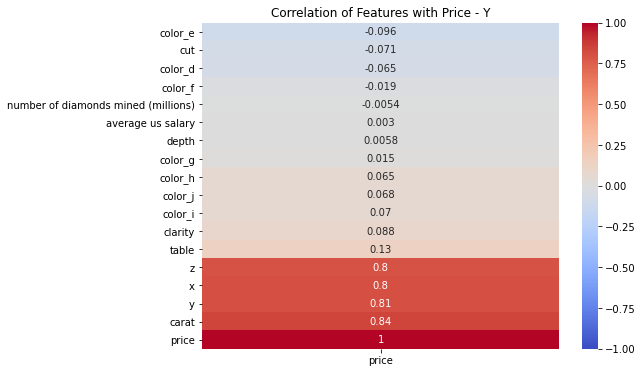

In [301]:
target_corr = df_replaced.corr()[["price"]].sort_values(by = "price")
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Features with Price - Y")
plt.show()

In [302]:
# Dropping low correlated features

In [303]:


data = df_replaced[["z", "x", "y", "carat", "price"]]

In [304]:
data.head()

,z,x,y,carat,price
0,2.43,3.95,3.98,0.23,326.0
1,2.31,3.89,3.84,0.21,326.0
2,2.31,4.05,4.07,0.23,327.0
3,2.63,4.20,4.23,0.29,334.0
4,2.75,4.34,4.35,0.31,335.0


In [305]:
data.shape

(48890, 5)

In [306]:
data.dropna(inplace = True)

<ipython-input-306-48a623a66630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [307]:
data.shape

(48815, 5)

In [308]:
### Data Preparation

In [309]:
## Shuffling dataframe

In [310]:
# data = data.sample(frac=1).reset_index(drop=True)

In [311]:
X = data.drop(columns = ["price"])
Y = data["price"]

In [312]:
X = X.values
Y = Y.values.reshape(-1, 1)

In [313]:
print("Created Matrices: ")
print("X : \n", X)
print("Y: \n", Y)

Created Matrices: 
X : 
 [[2.43 3.95 3.98 0.23]
 [2.31 3.89 3.84 0.21]
 [2.31 4.05 4.07 0.23]
 ...
 [3.56 5.66 5.68 0.7 ]
 [3.74 6.15 6.12 0.86]
 [3.64 5.83 5.87 0.75]]
Y: 
 [[ 326.]
 [ 326.]
 [ 327.]
 ...
 [2757.]
 [2757.]
 [2757.]]


In [314]:
# 3.c Splitting the dataset into training (80%) and testing (20%)

In [315]:
split = int(len(X) * 0.8)
split

39052

In [316]:
X_train, X_test = X[:split], X[split:]
y_train, y_test = Y[:split], Y[split:]

In [317]:
# 3.d Print the shapes of X_train, y_train, X_test, y_test

In [318]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (39052, 4)
Shape of y_train: (39052, 1)
Shape of X_test: (9763, 4)
Shape of y_test: (9763, 1)


In [319]:
# Normalizing features

In [320]:
max_X_train = np.amax(X_train)
min_X_train = np.amin(X_train)

max_X_test = np.amax(X_test)
min_X_test = np.amin(X_test)

In [321]:
X_train

array([[2.43, 3.95, 3.98, 0.23],
       [2.31, 3.89, 3.84, 0.21],
       [2.31, 4.05, 4.07, 0.23],
       ...,
       [3.17, 5.4 , 5.35, 0.54],
       [3.46, 5.47, 5.52, 0.64],
       [2.97, 5.31, 5.22, 0.5 ]])

In [322]:
min_X_train

0.2

In [323]:
max_X_train

9.26

In [324]:
(X_train - min_X_train) / (max_X_train - min_X_train)

array([[0.24613687, 0.41390728, 0.41721854, 0.00331126],
       [0.23289183, 0.40728477, 0.401766  , 0.00110375],
       [0.23289183, 0.42494481, 0.42715232, 0.00331126],
       ...,
       [0.32781457, 0.57395143, 0.56843267, 0.03752759],
       [0.3598234 , 0.5816777 , 0.58719647, 0.04856512],
       [0.30573951, 0.56401766, 0.55408389, 0.03311258]])

In [325]:
X_train = (X_train - min_X_train) / (max_X_train - min_X_train)

In [326]:
X_test = (X_test - min_X_test) / (max_X_test - min_X_test)

In [327]:
max_y_train = np.amax(y_train)
min_y_train = np.amin(y_train)

max_y_test = np.amax(y_test)
min_y_test = np.amin(y_test)

In [328]:
y_train = (y_train - min_y_train) / (max_y_train - min_y_train)
y_test = (y_test - min_y_test) / (max_y_test - min_y_test)

In [329]:
# Adding 1s for the intercept column

In [330]:
X_train_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_b = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [331]:
# 4 Linear regression using OLS

In [332]:
# 4.a w = (X^T X)^-1 X^T Y

In [333]:
w = np.linalg.inv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)

In [334]:
# 4.b Making the predictions

In [335]:
y_train_pred = X_train_b @ w
y_test_pred = X_test_b @ w

In [336]:
# Mean squared error

In [337]:
mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test = np.mean((y_test - y_test_pred) ** 2)

In [338]:
print(f"MSE of Training data: {mse_train}")
print(f"MSE of Testing data: {mse_test}")


MSE of Training data: 0.017587617354992716
MSE of Testing data: 0.1281225166660127


In [339]:
# 4.c Plot the predictions vs actual targets

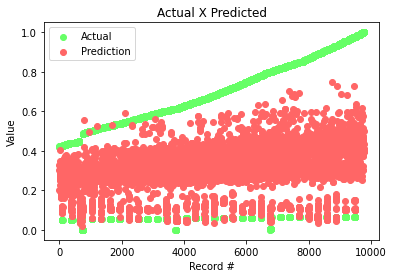

In [340]:
alpha = 0.4
plt.scatter([i for i in range(len(y_test))], y_test, color=[alpha, 1., alpha], label="Actual")
plt.scatter([i for i in range(len(y_test))], y_test_pred, color=[1., alpha, alpha], label="Prediction")
plt.xlabel("Record #")
plt.ylabel('Value')
plt.title('Actual X Predicted')
plt.legend()
plt.show()


In [341]:
w_linear = w

In [342]:
# 5. Ridge regression using OLS

In [343]:
# Let lambda
lambda_val = 0.7


In [344]:
# b. Computing weights

In [345]:
X_train_b.shape[1]

5

In [346]:
I = np.zeros((5, 5))

In [347]:
for idx in range(X_train_b.shape[1]):
    I[idx, idx] = 1

In [348]:
# Calculating weights

In [349]:
# w = (X^T X + Lambda I)^-1 X^T Y

In [350]:
w = np.linalg.inv(X_train_b.T @ X_train_b + lambda_val * I) @ (X_train_b.T @ y_train)

In [351]:
# Get predictions


In [352]:
y_train_pred = X_train_b @ w
y_test_pred = X_test_b @ w


In [353]:
# Mean Square Error
mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test = np.mean((y_test - y_test_pred) ** 2)

In [354]:
print(f"MSE of Training data: {mse_train}")
print(f"MSE of Testing data: {mse_test}")


MSE of Training data: 0.017600854663950366
MSE of Testing data: 0.12425951994438578


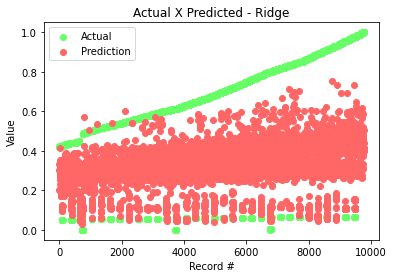

In [355]:
alpha = 0.4
plt.scatter([i for i in range(len(y_test))], y_test, color=[alpha, 1., alpha], label="Actual")
plt.scatter([i for i in range(len(y_test))], y_test_pred, color=[1., alpha, alpha], label="Prediction")
plt.xlabel("Record #")
plt.ylabel('Value')
plt.title('Actual X Predicted - Ridge')
plt.legend()
plt.show()


In [356]:
w

array([[-0.24770265],
       [-0.05213424],
       [-0.22290829],
       [ 0.77079719],
       [ 3.14596093]])

In [357]:
import pickle
with open('MANOGNA_VANAM_assignment1_part3.pickle', 'wb') as f:
    pickle.dump({'weights': w}, f)

In [ ]:
# Refs:
# https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
# https://machinelearningmastery.com/ridge-regression-with-python/
# https://jbhender.github.io/Stats506/F17/Projects/G13/Python.html
# https://www.geeksforgeeks.org/ordinary-least-squares-and-ridge-regression-variance-in-scikit-learn/
# https://keremkargin.medium.com/ridge-regression-fundamentals-and-modeling-in-python-bb56f4301f62



